# CSE152B - Spring 2022: Homework 1
## Computing Resources

You should be assigned an account that has access to GPU clusters on https://datahub.ucsd.edu/. Steps to set up the environment:
- Login with your UCSD credentials;
- Launch a GPU instance with (1 GPU, 8 CPU, 16G RAM). This will lead you to a Jupyter Notebook GUI, where you can browse files, launch a terminal with bash environment via (upper-right) New -> Terminal.
- You can also access the container with command line from your local terminal:
    - `ssh {your ucsd id}@dsmlp-login.ucsd.edu` # use your UCSD credentials
    - get active container via `kubectl get pods`
    - attach to the pod via `kubesh {pod name you got from above}`
    - then you will be in the bash environment inside the container, identical to the terminal launched from Jupyter Notebook.
    
## Prepare the notebook and codes
Once you are in the bash environment from the terminal, pull the code for HW1 by:

```bash
cd ~
git clone --recurse-submodules -j8 https://github.com/Jerrypiglet/cse152b-hw1-release-sp22.git
cd cse152b-hw1-release-sp22
cd pytorch-superpoint/datasets
ln -s /datasets/cs152b-sp22-a00-public/hpatches-sequences-release/ HPatches # map the public dataset to your location
cd ..
```

Then prepare the environment only for the first time:
```bash
conda init bash # initialize the enviroment
source ~/.bashrc
```

Everytime using the terminal (newly launched/reconnected), run this so that you have access to all the packages:
```bash
conda activate /datasets/cs152b-sp22-a00-public/envs/py38-sp # activate the enviroment
```

If it runs successfully, you will see prefix `(py38-sp)` in your current line as highlighted:

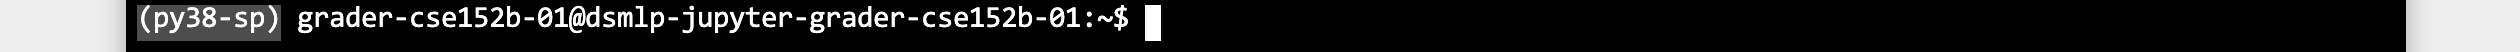

## Submission Instructions
1. Attempt all questions.
2. Please comment all your code adequately.
3. Include all relevant information such as text answers, output images in notebook.
4. **Academic integrity:** The homework must be completed individually.

5. **Submission instructions:**  
 (a) Submit the notebook and its PDF version on Gradescope.  
 (b) Rename your submission files as Lastname_Firstname.ipynb and Lastname_Firstname.pdf.  
 (c) Correctly select pages for each answer (only your answers; excluding the problem description text) on Gradescope to allow proper grading.

6. **Due date:** Assignments are due Fri, Apr 22, by 11pm PST.

# Question 1: SuperPoint [1](http://openaccess.thecvf.com/content_cvpr_2018_workshops/papers/w9/DeTone_SuperPoint_Self-Supervised_Interest_CVPR_2018_paper.pdf)

In this question we will look at the method SuperPoint [1], for establishing correspondences between a pair of images. Similar to UCN [2] which was discussed in the lectures, SuperPoint is a deep network to learn descriptors. However, SuperPoint simultaneously learns an interest point detector. In this question, you will generalize your understanding from the lectures to learn about SuperPoint, answer a few conceptual questions, test SuperPoint with pretrained models and observe the results.

In this question we will be using implementation of SuperPoint from a public repo (https://github.com/eric-yyjau/pytorch-superpoint).

**Note**: All paths in this question are relative to *./pytorch-superpoint/*. All scripts/commands should be run from that path in the terminal (by first ``cd pytorch-superpoint/``).

## Q1.1: Overall pipeline
The overall pipeline of SuperPoint is given in Fig. 3 of the paper. Please read Section 3 with a focus on Section 3.1 and 3.2 and answer:

(a) Why does SuperPoint use a shared encoder for interest point detection (Interest Point Decoder) and description (Descriptor Decoder)? (3 points)

`write your answer here`

(b) What is the motivation for the output shape of Interest Point Decoder being  $H/8 \times W/8 \times 64$, instead of directly outputting an $H \times W$ heatmap from the last layer of the CNN-based decoder? (3 points)

`write your answer here`

## Q1.2: MagicPoint

The training pipeline is described in Section 4 and 5. In Section 4, the detector part is *trained on synthetic images dataset* with pre-defined interest points, in a fully supervised fashion. The resulting interest point detector is named **MagicPoint**. You will run inference for **MagicPoint** with model weights pretrained on synthetic images.

First, make sure the pretrained model in *configs/magicpoint_repeatability_heatmap.yaml* is:

```bash
pretrained: 'logs/magicpoint_synth_t2/checkpoints/superPointNet_100000_checkpoint.pth.tar'
```

Run the following code in your terminal to run the inference over 100 images from HPatches dataset and export the results, following the experiment setup in Section 7:

```bash
python export.py export_descriptor  configs/magicpoint_repeatability_heatmap.yaml magicpoint_syn_TEST_hpatches
```

Results are saved to: *logs/magicpoint_syn_TEST_hpatches/pedictions/{%d}.npz*

Then, run the evaluation script to load the exported results and compute various metrics:

```bash
python evaluation.py logs/magicpoint_syn_TEST_hpatches/predictions --repeatibility --outputImg --homography --plotMatching
```

The following metrics will be printed out at the end of the run, similar to what is measured in Table 4 and explained in detail in Appendix A:

- Detector metrics:
    - Rep. (repeatability)
    - MLE (localization error)
- Descriptor metrics:
    - NN mAP (mean AP)
    - M. score (matching score)
- Homography accuracy under varying thresholds of pixel offsets (correctness_ave)

Please read the paper for detailed description of the metrics. Visualizations of interest points detected for a pair of images are saved to *logs/superpoint_coco_TEST_hpatches/pedictions/repeatibility/{%d}m.png*. 

### **Please answer:**

(a) Report the 4 metrics given above from the run.

`write your answer here`

(b) Please explain: what is repeatibility?

`write your answer here`

(c) Report detection visualizations for samples 2 and 5 by **MagicPoint** in the Markdown block below.

``change the paths and run the block to display the images``

![](pytorch-superpoint/logs/magicpoint_syn_TEST_hpatches/pedictions/repeatibility3/2.png)
![](pytorch-superpoint/logs/magicpoint_syn_TEST_hpatches/pedictions/repeatibility3/5.png)

Then, you will use **SIFT** and **Harris corner detector** to run interest point detection on the same set of images:

```bash
python export_classical.py export_descriptor configs/classical_descriptors.yaml sift_TEST_hpatches --correspondence

python evaluation.py logs/sift_TEST_hpatches/predictions --sift --repeatibility --outputImg --homography --plotMatching
```

Visualizations of interest points detected for a pair of images are saved to *logs/sift_TEST_hpatches/pedictions/repeatibility3/{%d}_{HARRIS, SIFT}.png*. 

### **Please answer:**

(d) Report the detection metrics (**repeatability** and **localization error**) from Harris detector from the above run.

`write your answer here`

(e) Report detection visualizations from samples 2 and 5 by **Harris detector** in the Markdown block below. 

`change the paths and run the block to display the images`

![](pytorch-superpoint/logs/sift_TEST_hpatches/pedictions/repeatibility3/2_HARRIS.png)
![](pytorch-superpoint/logs/sift_TEST_hpatches/pedictions/repeatibility3/5_HARRIS.png)

(f) Does **MagicPoint** perform better than **Harris detector**? Explain why or why not.

`write your answer here`

## Q1.3: Homographic Adaptation and SuperPoint

**MagicPoint** is trained with full supervision on synthetic dataset, where interest points are defined as mostly corners of simple geometric primitatives (Fig. 4). However as a base detector, MagicPoint will not generalize well to natural images (e.g. HPatches) because of domain gap. As a result, Homographic Adaptation is proposed (see Section 5) to create pseudo-ground truth interest points on real images, and use them to finetune MagicPoint on real images in a self-supervised paradigm. The finetuned detector is named **SuperPoint**. In this question, you will run inference of SuperPoint on HPatches, which is trained on COCO dataset.

You will use the same script to run inference, except that using SuperPoint finetuned on COCO instead of MagicPoint trained on synthetic images dataset.

First, change the pretrained model in *configs/magicpoint_repeatability_heatmap.yaml* via:

```bash
pretrained: 'logs/magicpoint_synth_t2/checkpoints/superPointNet_100000_checkpoint.pth.tar'
```
`==change to==>`
```bash
pretrained: 'logs/superpoint_coco_heat2_0/checkpoints/superPointNet_170000_checkpoint.pth.tar'
```

Then run inference via:

```bash
python export.py export_descriptor  configs/magicpoint_repeatability_heatmap.yaml superpoint_coco_TEST_hpatches

python evaluation.py logs/superpoint_coco_TEST_hpatches/predictions --repeatibility --outputImg --homography --plotMatching
```

results are saved to: *logs/superpoint_coco_TEST_hpatches/pedictions*

### Please answer:

(a) Report the detection metrics (**repeatability** and **localization error**) from **SuperPoint** from the above run.

`write your answer here`

(b) Does **SuperPoint** perform better than **MagicPoint** and **Harris detector**? Explain why or why not.

`write your answer here`

The descriptor is measured via descriptor metrics (**NN mAP** and **M. score**, see Section 7.3 and Appendix A)*.*  Additionally, detector and descriptor can be jointly evaluated via homography estimation, by computing homography from estimated correspondences, and measuring the average error of pixel offsets using the homography (see Appendix A).

(c) Report and compare SuperPoint and SIFT on **NN mAP**, **M. score** and **Homography accuracy under varying thresholds**.


`write your answer here`

(d) Does SuperPoint perform better than SIFT on **Homography accuracy** for lower thresholds? Explain why or why not.

`write your answer here`

## Q1.4 Try SuperPoint on your own image pairs
In this question you are encouraged to try your own image pairs which have reasonable overlap of contents between two images. A sample image pair is given in *configs/magicpoint_repeatability_heatmap_your_images.yaml → `data[’im_path1']`, `data[’im_path2’]`*

Please first run the following code to estimate and visualize correspondences of the sample pair from KITTI dataset. Visualization will be saved at *logs/superpoint_coco_TEST_yours/predictions/matching/0m.png*. If everything goes well, the image should look like:

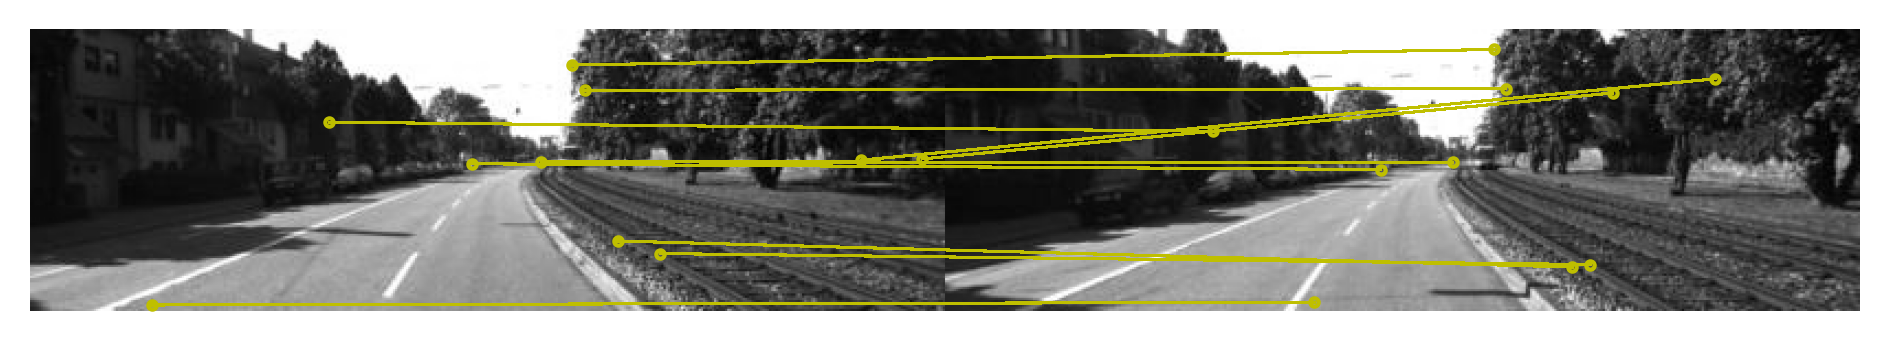

Next, please change the image pair paths to a pair taken by yourself (under the assumption that reasonable amount of correspondences can be visually identified; also format has to be .jpg or .png). Also adjust the resize flag `data['preprocessing']['resize']` to be values propotional to your image aspect ratio and a size that fits into the gpu. You are also encourage to tweak the viaualization parameters of ratio/max number of all matches (variables `ratio_max` and `matches_max`) to make the visualization look good with reasonable amount of matches that is not too clustered.

```bash
python export.py export_descriptor  configs/magicpoint_repeatability_heatmap_your_images.yaml superpoint_coco_TEST_yours

python evaluation.py logs/superpoint_coco_TEST_yours/predictions --outputImg --plotMatchingOnly
```

(a) Report your visualizations below.

``change the paths and run the block to display the image``
![](pytorch-superpoint/logs/superpoint_coco_TEST_yours/predictions/matching/0m.png)

(b) **Bonus:** You are encouraged to take a second pair where it is more ‘difficult’ to establish abundant correspondences than the first set above. Explain how you created a scenario where correspondence is more challenging. Report the results again and explain your observation on the differences between results for the two pairs of images.

``change the paths and run the block to display the other image``
![](pytorch-superpoint/logs/superpoint_coco_TEST_yours/predictions/matching/0m.png)

`write your answer here`

# Q2: Metric Learning for Fashion Images Retrival

In this problem you will train a CNN for learning embeddings for fashion images (e.g. clothing, shoes) with techniques from metric learning (e.g. Triplet loss, hard negative mining, distance functions). Once the network is trained, you will observe the application on similar image retrival, and evaluate design choices of the model.

## Q2.1: Train a simple CNN and observe training and evaluations.

Run the following code within the notebook, which includes a full pipeline of learning embeddings for fashion images. By default the model will train for 2 epochs (i.e. twice over all training samples), with cosine similarity as distance function for embeddings, triplet margin loss as discussed in lectures, and semi-hard negative mining strategy. After each epoch, the pipeline will evaluate on a held-out test set to measure the accuracy with [`accuracy_calculator.get_accuracy`](https://kevinmusgrave.github.io/pytorch-metric-learning/accuracy_calculation/).

Run the following pipeline, and answer the questions below.

In [ ]:
!pip install pytorch-metric-learning
!pip install faiss-gpu

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import datasets, transforms

from pytorch_metric_learning import distances, losses, miners, reducers, testers
from pytorch_metric_learning.utils.accuracy_calculator import AccuracyCalculator
from pytorch_metric_learning.distances import CosineSimilarity
from pytorch_metric_learning.utils import common_functions as c_f
from pytorch_metric_learning.utils.inference import InferenceModel, MatchFinder

import matplotlib.pyplot as plt
import numpy as np



### Define a network architecture ###
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(9216, 128)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        # print(x.shape) # should be [batch_size, 9216]
        x = self.fc1(x)
        return x


### Do the training ###
def train(model, loss_func, mining_func, device, train_loader, optimizer, epoch):
    model.train()
    loss_list = []
    for batch_idx, (data, labels) in enumerate(train_loader):
        data, labels = data.to(device), labels.to(device)
        optimizer.zero_grad()
        embeddings = model(data)
        indices_tuple = mining_func(embeddings, labels)
        loss = loss_func(embeddings, labels, indices_tuple)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(
                "Epoch {} Iteration {}: Loss = {}, Number of mined triplets = {}".format(
                    epoch, batch_idx, loss, mining_func.num_triplets
                )
            )
        loss_list.append(loss.item())
    return loss_list


### convenient function from pytorch-metric-learning ###
def get_all_embeddings(dataset, model):
    tester = testers.BaseTester()
    return tester.get_all_embeddings(dataset, model)


### compute accuracy using AccuracyCalculator from pytorch-metric-learning ###
def test(train_set, test_set, model, accuracy_calculator):
    train_embeddings, train_labels = get_all_embeddings(train_set, model)
    test_embeddings, test_labels = get_all_embeddings(test_set, model)
    train_labels = train_labels.squeeze(1)
    test_labels = test_labels.squeeze(1)
    print("Computing accuracy")
    accuracies = accuracy_calculator.get_accuracy(
        test_embeddings, train_embeddings, test_labels, train_labels, False
    )
    print("Test set accuracy (Precision@1) = {:f}".format(accuracies["precision_at_1"]))
    return accuracies


device = torch.device("cuda")

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)

batch_size = 256

dataset1 = datasets.FashionMNIST(".", train=True, download=True, transform=transform)
dataset2 = datasets.FashionMNIST(".", train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1, batch_size=256, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset2, batch_size=256)

model = Net().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.01)
num_epochs = 2


### pytorch-metric-learning stuff ###
distance = distances.CosineSimilarity()
#distance = distances.LpDistance()
reducer = reducers.ThresholdReducer(low=0)

margin_num = 0.2
loss_func = losses.TripletMarginLoss(margin=margin_num, distance=distance, reducer=reducer)
#loss_func = losses.ContrastiveLoss()
#loss_func = losses.ArcFaceLoss(num_classes = 10, embedding_size = 128)
mining_func = miners.TripletMarginMiner(
    margin=margin_num, distance=distance, type_of_triplets="semihard"
)


accuracy_calculator = AccuracyCalculator(include=("precision_at_1",), k=1)
### pytorch-metric-learning stuff ###


loss_list_all = []
accuracies_list = []
accuracies = test(dataset1, dataset2, model, accuracy_calculator)
accuracies_list.append((0, accuracies))

for epoch in range(1, num_epochs + 1):
    loss_list = train(model, loss_func, mining_func, device, train_loader, optimizer, epoch)
    accuracies = test(dataset1, dataset2, model, accuracy_calculator)
    loss_list_all += loss_list
    accuracies_list.append((len(loss_list_all), accuracies))

**(a)** Report the final test set accuracy.

`write your answer here`

**(b)** Two variables are returned from the above code: `loss_list_all` which is a list of losses at each training iteration; `accuracies_list` which is a list of tuples for accuracies (precision) from testing after each epoch, with each tuple being `(ITERATION, {'precision_at_1': SOME NUMBER})`. You will plot [a double-y-axis figure of training losses and testing accuracies](https://stackoverflow.com/a/14762601) from those two variables, with the x-axis being the training iterations, and the left y-axis being the training losses, right y-axis being the testing accuracies. Your plot does not have to be identical to the reference plot as below, but should ideally include two curves similar to below, and necessary labels & legends.

![](images/download.png)

In [5]:
import matplotlib.pyplot as plt

# your code here

**(c)** You will then test the trained model on image retrival task, to retrieve the nearest images for a few test query images. Run the following code and submit the results. Make sure results for >=2 samples are visible in your converted PDF submission.

In [ ]:
def print_decision(is_match):
    if is_match:
        print("Same class")
    else:
        print("Different class")

mean = [0.1307]
std = [0.3081]
inv_normalize = transforms.Normalize(
    mean=[-m / s for m, s in zip(mean, std)], std=[1 / s for s in std]
)

def imshow(img, figsize=(8, 4)):
    img = inv_normalize(img)
    npimg = img.numpy()
    plt.figure(figsize=figsize)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


THRESHOLD = 0.7
match_finder = MatchFinder(distance=CosineSimilarity(), threshold=THRESHOLD)
inference_model = InferenceModel(model, match_finder=match_finder)
labels_to_indices = c_f.get_labels_to_indices(dataset2.targets)


# get 10 nearest neighbors for an input image
inference_model.train_knn(dataset2)
for label in range(0, 10):
    img_type = labels_to_indices[label]
    img = dataset2[img_type[0]][0].unsqueeze(0)
    print("query image")
    imshow(torchvision.utils.make_grid(img))
    distances, indices = inference_model.get_nearest_neighbors(img, k=10)
    nearest_imgs = [dataset2[i][0] for i in indices.cpu()[0]]
    print("nearest images")
    imshow(torchvision.utils.make_grid(nearest_imgs))

**(d)** Tweak the model, by
- Train for 200 epochs instead of 2;

Re-train the model. Plot the two curves again from (b) with the retrained model in the updated setting.

`include the image here, by downloading  from the notebook and uploading it into the ./images folder, modify the path and run the block to reveal the image:`

![](images/{your image.png})

**(e)** Further tweak the model by:

- Removing the two Dropout layers;
- Removing `self.conv2` and its activation function, and modify the input dimension of `self.fc1` from `9216` to some other number to make the layers fit together;
- Training for 200 epochs instead of 2;

1) Copy and paste your new model class in the code block below; 

2) Plot the curves again; 

3) Compare with the curves from (d): What difference can you observe between results of the two models?

2) Do you see `overfitting` with the newest model from (e)? If yes, can you explain what it is based on the comparison between (d) and (e), and what might be the cause of `overfitting`?

In [ ]:
1) ### Define a network architecture ###
class Net(nn.Module):
# your code here

2) `include the image here, by downloading from the notebook and uploading it into the ./images folder, modify the path and run the block to reveal the image:`

![](images/{your image.png})

3) `write your answer here`

4) `write your answer here`

**(f)** Change the margin of `losses.TripletMarginLoss` from 0.2 to 10, and re-train the ORIGINAL model (without the modification in (e)) for 2 epochs. 

1) Report the final test accuracy; 

2) Compare with (a): what and why is the difference?

1) `write your answer here`

2) `write your answer here`

**(g)** Change the miner property to `type_of_triplets="hard"` (which is for hard nagetive mining instead of looking for semi-hard negative samples) and re-train the ORIGINAL model (without the modification in (e)) for 2 epochs.

1) Report the final test accuracy;

2) Plot the curves again; 

3) Compare with (a): what and why is the difference?

1) `write your answer here`

2) `include the image here, by downloading  from the notebook and uploading it into the ./images folder, modify the path and run the block to reveal the image:`

![](images/{your image.png})

3) `write your answer here`

# Reference
[1] DeTone, Daniel, Tomasz Malisiewicz, and Andrew Rabinovich. ["Superpoint: Self-supervised interest point detection and description."](http://openaccess.thecvf.com/content_cvpr_2018_workshops/papers/w9/DeTone_SuperPoint_Self-Supervised_Interest_CVPR_2018_paper.pdf) *Proceedings of the IEEE conference on computer vision and pattern recognition workshops*
. 2018.

[2] Choy, Christopher B., et al. ["Universal correspondence network."](https://proceedings.neurips.cc/paper/2016/file/b495ce63ede0f4efc9eec62cb947c162-Paper.pdf) *Advances in neural information processing systems*
 29 (2016).